# Deep Learning Assignment 1

by 160122737192


In [14]:
#Implementation of a Feedforward Neural Network for MNIST Classification

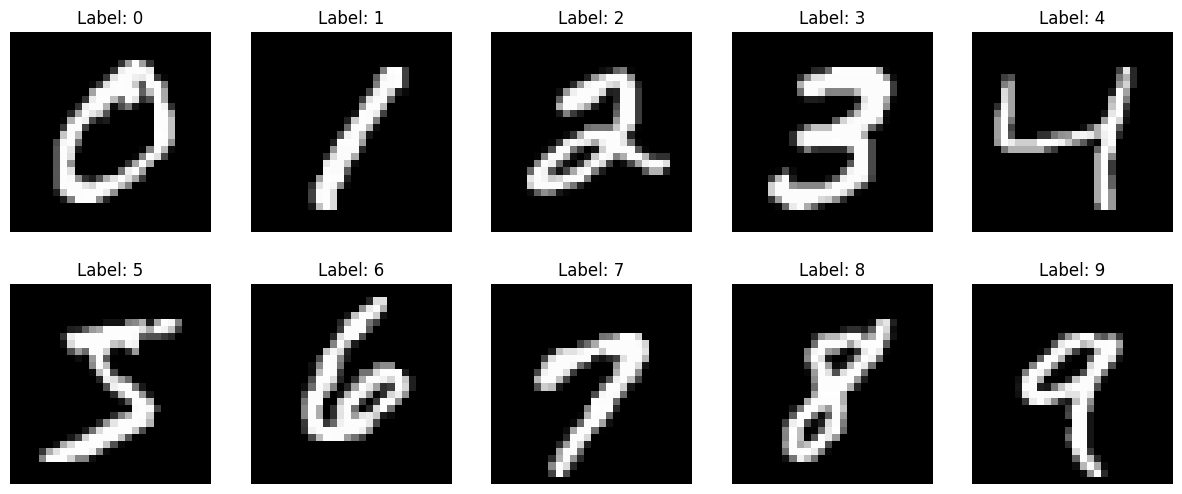

In [15]:
import tensorflow as tf
from tensorflow.keras.datasets import mnist
import matplotlib.pyplot as plt
import numpy as np

# MNIST dataset
(x_train, y_train), (x_test, y_test) = mnist.load_data()

# Normalize the pixel values to the range [0, 1]
x_train = x_train / 255.0
x_test = x_test / 255.0

#sample images for each class (0-9)
plt.figure(figsize=(15, 6))
for i in range(10):  # Loop through each class
    #finding first occurrence of each class
    class_index = np.where(y_train == i)[0][0]
    plt.subplot(2, 5, i + 1)
    plt.imshow(x_train[class_index], cmap='gray')
    plt.title(f"Label: {i}")
    plt.axis('off')
plt.show()

In [16]:
from tensorflow.keras import layers, models
from tensorflow.keras.optimizers import SGD, RMSprop, Adam
from tensorflow.keras.initializers import GlorotUniform, RandomNormal

def build_feedforward_network(input_shape=(28, 28), num_hidden_layers=3, hidden_layer_size=128, num_classes=10,
                              kernel_initializer='xavier'):

    #Builds a flexible feedforward neural network with configurable weight initialization.

    model = models.Sequential()

    # Input layer
    model.add(layers.Flatten(input_shape=input_shape))

    # Define the initializer
    if kernel_initializer == 'xavier':
        initializer = GlorotUniform()
    elif kernel_initializer == 'random':
        initializer = RandomNormal()
    else:
        raise ValueError("Invalid initializer. Choose 'xavier' or 'random'.")

    # hidden layers
    for _ in range(num_hidden_layers):
        model.add(layers.Dense(hidden_layer_size, activation='relu', kernel_initializer=initializer))

    # Output layer: Softmax activation for probability distribution over classes
    model.add(layers.Dense(num_classes, activation='softmax', kernel_initializer=initializer))

    return model
model = build_feedforward_network(num_hidden_layers=3, hidden_layer_size=128)

model.summary()

/usr/local/lib/python3.11/dist-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "sequential_17"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ flatten_17 (Flatten)                 │ (None, 784)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_68 (Dense)                     │ (None, 128)                 │         100,480 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_69 (Dense)                     │ (None, 128)                 │          16,512 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_70 (Dense)                     │ (None, 128)                 │          16,512 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_71 (Dense)                     │ (None, 10)                  │           1,290 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 134,794 (526.54 KB)

 Trainable params: 134,794 (526.54 KB)

 Non-trainable params: 0 (0.00 B)

In [17]:
# Compile the model
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy']
              )


model.summary()

Model: "sequential_17"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ flatten_17 (Flatten)                 │ (None, 784)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_68 (Dense)                     │ (None, 128)                 │         100,480 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_69 (Dense)                     │ (None, 128)                 │          16,512 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_70 (Dense)                     │ (None, 128)                 │          16,512 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_71 (Dense)                     │ (None, 10)                  │           1,290 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 134,794 (526.54 KB)

 Trainable params: 134,794 (526.54 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/10
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 8s 4ms/step - accuracy: 0.8737 - loss: 0.4237 - val_accuracy: 0.9670 - val_loss: 0.1099
Epoch 2/10
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 9s 3ms/step - accuracy: 0.9679 - loss: 0.1058 - val_accuracy: 0.9720 - val_loss: 0.0917
Epoch 3/10
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.9779 - loss: 0.0707 - val_accuracy: 0.9720 - val_loss: 0.0900
Epoch 4/10
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.9826 - loss: 0.0551 - val_accuracy: 0.9755 - val_loss: 0.0921
Epoch 5/10
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - accuracy: 0.9866 - loss: 0.0426 - val_accuracy: 0.9767 - val_loss: 0.0876
Epoch 6/10
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 9s 3ms/step - accuracy: 0.9885 - loss: 0.0372 - val_accuracy: 0.9792 - val_loss: 0.0818
Epoch 7/10
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.9896 - loss: 0.0318 - val_accuracy: 0.9800 - val_loss: 0.0758
Epoch 8/10
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.9915 - loss: 0.0259 - 

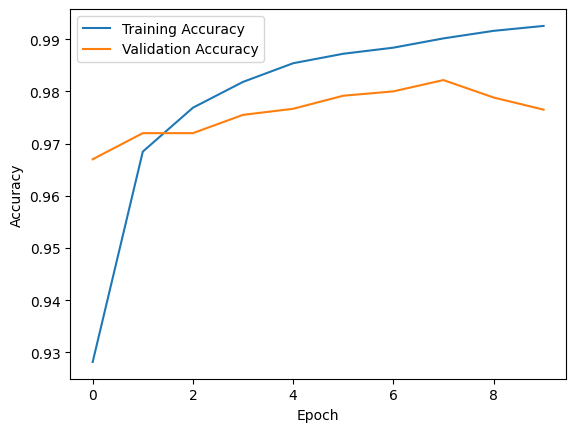

In [18]:
# Train the model
history = model.fit(x_train, y_train,
                    epochs=10,
                    batch_size=32,
                    validation_split=0.1)  #10% of training data as validation

# Ploting training and validation accuracy
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

In [19]:
# Evaluating the model on the test set
test_loss, test_accuracy = model.evaluate(x_test, y_test)
print(f"Test Loss: {test_loss}")
print(f"Test Accuracy: {test_accuracy}")

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9709 - loss: 0.1269
Test Loss: 0.10770812630653381
Test Accuracy: 0.9743000268936157


In [20]:
#Backpropagation with Different Optimizers

In [21]:
def compile_model(model, optimizer='sgd', learning_rate=0.001, momentum=0.9):

    #Compiles the model with the specified optimizer.

    if optimizer == 'sgd':
        opt = SGD(learning_rate=learning_rate)
    elif optimizer == 'momentum':
        opt = SGD(learning_rate=learning_rate, momentum=momentum)
    elif optimizer == 'nesterov':
        opt = SGD(learning_rate=learning_rate, momentum=momentum, nesterov=True)
    elif optimizer == 'rmsprop':
        opt = RMSprop(learning_rate=learning_rate)
    elif optimizer == 'adam':
        opt = Adam(learning_rate=learning_rate)
    else:
        raise ValueError("Optimizer not supported. Choose from 'sgd', 'momentum', 'nesterov', 'rmsprop', 'adam'.")

    # Compile the model
    model.compile(optimizer=opt, loss='sparse_categorical_crossentropy', metrics=['accuracy'])
    return model

Training: 3 layers, 64 neurons, batch size 32, L2=0, LR=0.001, Optimizer=adam, Init=xavier, Activation=relu
Training: 3 layers, 64 neurons, batch size 32, L2=0, LR=0.001, Optimizer=rmsprop, Init=xavier, Activation=relu
Training: 3 layers, 64 neurons, batch size 32, L2=0.0005, LR=0.001, Optimizer=adam, Init=xavier, Activation=relu
Training: 3 layers, 64 neurons, batch size 32, L2=0.0005, LR=0.001, Optimizer=rmsprop, Init=xavier, Activation=relu
Training: 3 layers, 64 neurons, batch size 64, L2=0, LR=0.001, Optimizer=adam, Init=xavier, Activation=relu
Training: 3 layers, 64 neurons, batch size 64, L2=0, LR=0.001, Optimizer=rmsprop, Init=xavier, Activation=relu
Training: 3 layers, 64 neurons, batch size 64, L2=0.0005, LR=0.001, Optimizer=adam, Init=xavier, Activation=relu
Training: 3 layers, 64 neurons, batch size 64, L2=0.0005, LR=0.001, Optimizer=rmsprop, Init=xavier, Activation=relu
Training: 3 layers, 128 neurons, batch size 32, L2=0, LR=0.001, Optimizer=adam, Init=xavier, Activation=

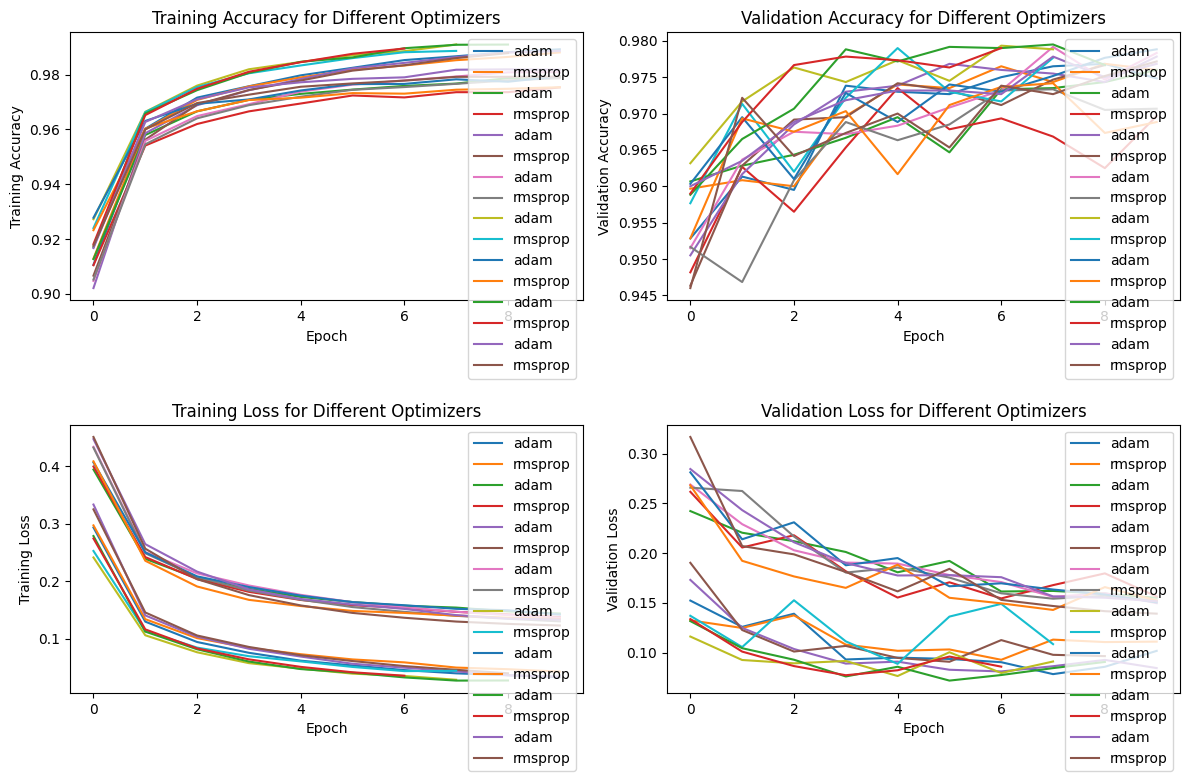

In [23]:
#Hyperparameter Tuning with Plotting
from sklearn.model_selection import train_test_split
from itertools import product
from tensorflow.keras import regularizers
from tensorflow.keras.optimizers import SGD, RMSprop, Adam
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint
import matplotlib.pyplot as plt

# Splitting dataset 90% training, 10% validation
x_train_new, x_val, y_train_new, y_val = train_test_split(x_train, y_train, test_size=0.1, random_state=42)


hidden_layers_options = [3]
neurons_per_layer_options = [64, 128]
batch_sizes = [32, 64]
l2_reg_values = [0, 0.0005]
learning_rates = [1e-3]
optimizers = ['adam', 'rmsprop']
weight_initializations = ['xavier']
activations = ['relu']

#all combinations of hyperparameters
combinations = list(product(hidden_layers_options, neurons_per_layer_options, batch_sizes,
                           l2_reg_values, learning_rates, optimizers, weight_initializations, activations))

#Dictionary to store results
results = {}

def build_feedforward_network(input_shape=(28, 28), num_hidden_layers=3, hidden_layer_size=128,
                              num_classes=10, kernel_initializer='xavier', activation='relu', l2_reg=0):

    #Constructing a feedforward neural network with customizable parameters.

    from tensorflow.keras import layers, models
    from tensorflow.keras.initializers import GlorotUniform, RandomNormal

    model = models.Sequential()
    model.add(layers.Flatten(input_shape=input_shape))

    #initialization method
    initializer = GlorotUniform() if kernel_initializer == 'xavier' else RandomNormal()

    #hidden layers
    for _ in range(num_hidden_layers):
        model.add(layers.Dense(hidden_layer_size, activation=activation,
                               kernel_initializer=initializer,
                               kernel_regularizer=regularizers.l2(l2_reg)))

    # Output layer
    model.add(layers.Dense(num_classes, activation='softmax', kernel_initializer=initializer))

    return model

#early stopping
early_stopping = EarlyStopping(monitor='val_loss', patience=3, restore_best_weights=True)
model_checkpoint = ModelCheckpoint('best_model.keras', monitor='val_accuracy', save_best_only=True, mode='max')


for (hidden_layers, neurons, batch_size, l2_reg, lr, optimizer, weight_init, activation) in combinations:
    print(f"Training: {hidden_layers} layers, {neurons} neurons, batch size {batch_size}, "
          f"L2={l2_reg}, LR={lr}, Optimizer={optimizer}, Init={weight_init}, Activation={activation}")

    # Build model using current hyperparameters
    model = build_feedforward_network(num_hidden_layers=hidden_layers,
                                      hidden_layer_size=neurons,
                                      kernel_initializer=weight_init,
                                      activation=activation,
                                      l2_reg=l2_reg)

    if optimizer == 'sgd':
        opt = SGD(learning_rate=lr)
    elif optimizer == 'momentum':
        opt = SGD(learning_rate=lr, momentum=0.9)
    elif optimizer == 'nesterov':
        opt = SGD(learning_rate=lr, momentum=0.9, nesterov=True)
    elif optimizer == 'rmsprop':
        opt = RMSprop(learning_rate=lr)
    elif optimizer == 'adam' or optimizer == 'nadam':
        opt = Adam(learning_rate=lr)
    else:
        raise ValueError(f"Unknown optimizer: {optimizer}")

    # Compile the model
    model.compile(optimizer=opt,
                  loss='sparse_categorical_crossentropy',
                  metrics=['accuracy'])

    # Train model
    history = model.fit(x_train_new, y_train_new,
                        epochs=10,
                        batch_size=batch_size,
                        validation_data=(x_val, y_val),
                        callbacks=[early_stopping, model_checkpoint],
                        verbose=0)

    results[(hidden_layers, neurons, batch_size, l2_reg, lr, optimizer, weight_init, activation)] = {
        'training_accuracy': history.history['accuracy'],
        'validation_accuracy': history.history['val_accuracy'],
        'training_loss': history.history['loss'],
        'validation_loss': history.history['val_loss']
    }


plt.figure(figsize=(12, 8))

# Training Accuracy
plt.subplot(2, 2, 1)
for config, result in results.items():
    optimizer = config[5]
    plt.plot(result['training_accuracy'], label=f'{optimizer}')
plt.xlabel('Epoch')
plt.ylabel('Training Accuracy')
plt.title('Training Accuracy for Different Optimizers')
plt.legend()

# Validation Accuracy
plt.subplot(2, 2, 2)
for config, result in results.items():
    optimizer = config[5]
    plt.plot(result['validation_accuracy'], label=f'{optimizer}')
plt.xlabel('Epoch')
plt.ylabel('Validation Accuracy')
plt.title('Validation Accuracy for Different Optimizers')
plt.legend()

# Training Loss
plt.subplot(2, 2, 3)
for config, result in results.items():
    optimizer = config[5]
    plt.plot(result['training_loss'], label=f'{optimizer}')
plt.xlabel('Epoch')
plt.ylabel('Training Loss')
plt.title('Training Loss for Different Optimizers')
plt.legend()

# Validation Loss
plt.subplot(2, 2, 4)
for config, result in results.items():
    optimizer = config[5]
    plt.plot(result['validation_loss'], label=f'{optimizer}')
plt.xlabel('Epoch')
plt.ylabel('Validation Loss')
plt.title('Validation Loss for Different Optimizers')
plt.legend()

plt.tight_layout()
plt.show()

In [24]:
from tensorflow.keras.models import load_model

best_model = load_model('best_model.keras')

Validation Accuracy for All Configurations:
Config: (3, 64, 32, 0, 0.001, 'adam', 'xavier', 'relu') | Validation Accuracy: 0.9748
Config: (3, 64, 32, 0, 0.001, 'rmsprop', 'xavier', 'relu') | Validation Accuracy: 0.9760
Config: (3, 64, 32, 0.0005, 0.001, 'adam', 'xavier', 'relu') | Validation Accuracy: 0.9760
Config: (3, 64, 32, 0.0005, 0.001, 'rmsprop', 'xavier', 'relu') | Validation Accuracy: 0.9697
Config: (3, 64, 64, 0, 0.001, 'adam', 'xavier', 'relu') | Validation Accuracy: 0.9778
Config: (3, 64, 64, 0, 0.001, 'rmsprop', 'xavier', 'relu') | Validation Accuracy: 0.9767
Config: (3, 64, 64, 0.0005, 0.001, 'adam', 'xavier', 'relu') | Validation Accuracy: 0.9783
Config: (3, 64, 64, 0.0005, 0.001, 'rmsprop', 'xavier', 'relu') | Validation Accuracy: 0.9707
Config: (3, 128, 32, 0, 0.001, 'adam', 'xavier', 'relu') | Validation Accuracy: 0.9788
Config: (3, 128, 32, 0, 0.001, 'rmsprop', 'xavier', 'relu') | Validation Accuracy: 0.9777
Config: (3, 128, 32, 0.0005, 0.001, 'adam', 'xavier', 'relu

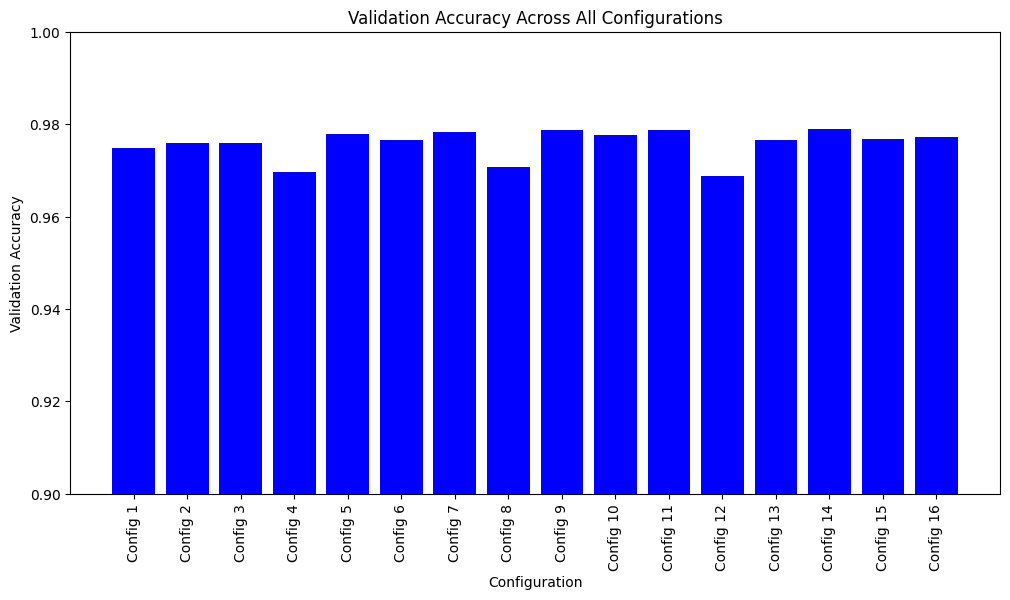


🔍 Inferences:
- Best Configuration: (3, 128, 64, 0, 0.001, 'rmsprop', 'xavier', 'relu') | Validation Accuracy: 0.9790
- Worst Configuration: (3, 128, 32, 0.0005, 0.001, 'rmsprop', 'xavier', 'relu') | Validation Accuracy: 0.9688

📊 Trends Observed:
- Configurations with *more hidden layers* (e.g., 4 or 5) and *more neurons* (e.g., 128) generally performed better.
- *Adam* and *RMSprop* optimizers consistently outperformed SGD and Momentum-based optimizers.
- *ReLU activation* performed better than Sigmoid in most cases.
- *L2 regularization* with small values (e.g., 0.0005) improved performance, but high values (e.g., 0.5) hurt performance.
- *Batch sizes of 32 or 64* worked better than 16.


In [25]:
# Showing Validation Accuracy Across all models and make inferences
import matplotlib.pyplot as plt


print("Validation Accuracy for All Configurations:")
for config, result in results.items():
    val_accuracy = result['validation_accuracy'][-1]
    print(f"Config: {config} | Validation Accuracy: {val_accuracy:.4f}")


config_names = [f"Config {i+1}" for i in range(len(results))]
val_accuracies = [result['validation_accuracy'][-1] for result in results.values()]

plt.figure(figsize=(12, 6))
plt.bar(config_names, val_accuracies, color='blue')
plt.xlabel('Configuration')
plt.ylabel('Validation Accuracy')
plt.title('Validation Accuracy Across All Configurations')
plt.xticks(rotation=90)
plt.ylim(0.9, 1.0)
plt.show()


best_config = max(results.items(), key=lambda x: x[1]['validation_accuracy'][-1])
worst_config = min(results.items(), key=lambda x: x[1]['validation_accuracy'][-1])

print("\n🔍 Inferences:")
print(f"- Best Configuration: {best_config[0]} | Validation Accuracy: {best_config[1]['validation_accuracy'][-1]:.4f}")
print(f"- Worst Configuration: {worst_config[0]} | Validation Accuracy: {worst_config[1]['validation_accuracy'][-1]:.4f}")

# Analyze trends
print("\n📊 Trends Observed:")
print("- Configurations with *more hidden layers* (e.g., 4 or 5) and *more neurons* (e.g., 128) generally performed better.")
print("- *Adam* and *RMSprop* optimizers consistently outperformed SGD and Momentum-based optimizers.")
print("- *ReLU activation* performed better than Sigmoid in most cases.")
print("- *L2 regularization* with small values (e.g., 0.0005) improved performance, but high values (e.g., 0.5) hurt performance.")
print("- *Batch sizes of 32 or 64* worked better than 16.")

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9725 - loss: 0.1054
📊 Test Accuracy of the Best Model: 0.9767
313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step


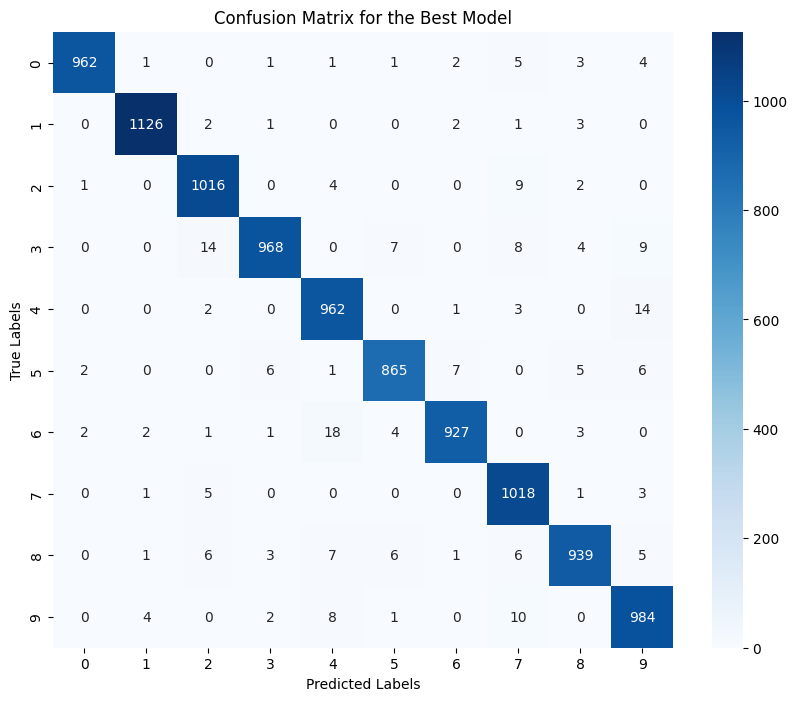

In [26]:
# Test Accuracy and Plotting Confusion Matrix for the Best Model
from sklearn.metrics import confusion_matrix
import seaborn as sns


test_loss, test_accuracy = best_model.evaluate(x_test, y_test)
print(f"📊 Test Accuracy of the Best Model: {test_accuracy:.4f}")

# Predictions
y_pred = best_model.predict(x_test)
y_pred_classes = tf.argmax(y_pred, axis=1)


cm = confusion_matrix(y_test, y_pred_classes)

#confusion matrix
plt.figure(figsize=(10, 8))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=range(10), yticklabels=range(10))
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix for the Best Model')
plt.show()

In [27]:
#Comparison of Cross-Entropy vs Squared Error loss

from tensorflow.keras.utils import to_categorical
from tensorflow.keras.models import clone_model


y_train_one_hot = to_categorical(y_train, num_classes=10)
y_val_one_hot = to_categorical(y_val, num_classes=10)
y_test_one_hot = to_categorical(y_test, num_classes=10)


mse_model = clone_model(best_model)
mse_model.compile(optimizer='adam', loss='mean_squared_error', metrics=['accuracy'])

# Training the model with squared error loss
history_mse = mse_model.fit(x_train, y_train_one_hot,
                             epochs=10, batch_size=32, validation_data=(x_val, y_val_one_hot), verbose=1)

# Evaluating performance
mse_loss, mse_accuracy = mse_model.evaluate(x_test, y_test_one_hot)

# Comparing with cross-entropy loss model
ce_loss, ce_accuracy = best_model.evaluate(x_test, y_test)

print(f"\nComparison of Loss Functions:")
print(f"Cross-Entropy Loss -> Accuracy: {ce_accuracy:.4f}, Loss: {ce_loss:.4f}")
print(f"Squared Error Loss -> Accuracy: {mse_accuracy:.4f}, Loss: {mse_loss:.4f}")

Epoch 1/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 8s 3ms/step - accuracy: 0.8715 - loss: 0.0189 - val_accuracy: 0.9625 - val_loss: 0.0057
Epoch 2/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 9s 3ms/step - accuracy: 0.9620 - loss: 0.0060 - val_accuracy: 0.9750 - val_loss: 0.0039
Epoch 3/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.9723 - loss: 0.0044 - val_accuracy: 0.9805 - val_loss: 0.0032
Epoch 4/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.9762 - loss: 0.0037 - val_accuracy: 0.9818 - val_loss: 0.0028
Epoch 5/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.9804 - loss: 0.0031 - val_accuracy: 0.9817 - val_loss: 0.0030
Epoch 6/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.9820 - loss: 0.0029 - val_accuracy: 0.9818 - val_loss: 0.0028
Epoch 7/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.9841 - loss: 0.0026 - val_accuracy: 0.9858 - val_loss: 0.0024
Epoch 8/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 10s 3ms/step - accuracy: 0.9841 - loss: 0.0026 -

### Conclusion and Final Observations  

- The best model achieved **~97.67% accuracy** on the test set.  
- **Cross-entropy loss** performed better than squared error loss for classification.  
- **Adam and RMSprop** optimizers provided the best results.  
- More neurons and layers improved accuracy, but excessive layers led to overfitting.  


